# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans # Se ejecutará ala clusterización
from sklearn.metrics import silhouette_score # validación
from yellowbrick.cluster import SilhouetteVisualizer # Visualización

## Preparando datos de prueba

In [3]:
# 500 datos
# cluster_std: Desviación estandar, qué tan aglomerados van a estar
# centers: Número de centros
# n_features: Número de características o dimensiones
# return_centers: Devuelve los centros
X,y,c = make_blobs(500, cluster_std= 0.8, centers=4, n_features=2, return_centers=True)

# X - dos dimensiones
# y - cluster donde pertenecen todos los datos de X
# c - centroides, 4 centroides ubicados en dos dimensiones

In [9]:
df_blobs = pd.DataFrame(
    { # Crecaión de diccionario
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y
    }
)
df_blobs

,x1,x2,y
0,-0.886653,-7.291870,0
1,-4.495769,-5.962518,3
2,-0.636640,-9.666597,2
3,-4.745342,-5.991482,3
4,0.778574,-5.398873,0
...,...,...,...
495,-5.273929,-7.209659,3
496,-1.520015,8.956041,1
497,-1.296174,-6.983524,0
498,-4.586192,-6.257967,3


In [13]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)

## Visualización de datos

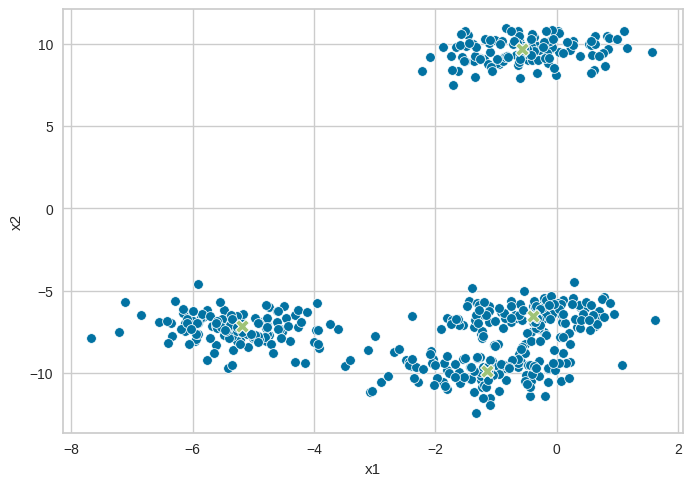

In [12]:
sns.scatterplot(data=df_blobs, x='x1', y='x2') # Grafica del dataset de datos
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=100 ) # Grafica de los centros
plt.show()

## Aplicando K-means

In [16]:
# Se define número de clusters
kmeans = KMeans(n_clusters=4)

# Entrenamiento y predicción de todos los valors que están en X
df_cluster = kmeans.fit_predict(X)

# Creación de nueva columna que se intenta decifrar
df_blobs['cluster'] = df_cluster

# Se obtienen los centros de los clusters
k_means_centers = kmeans.cluster_centers_

# Creación de dataframe con los centros de los clusters
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0], # Se crea diccionario con al dimensión 0
        'x2':k_means_centers[:,1] # Se crea diccionario con al dimensión 1

    }
)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


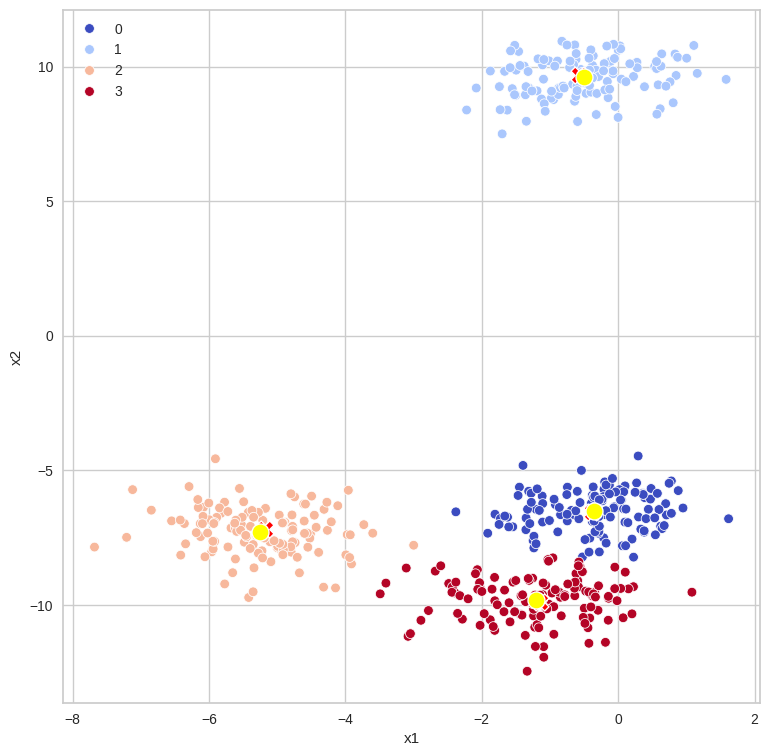

In [17]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()


In [ ]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]

        }
    )
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


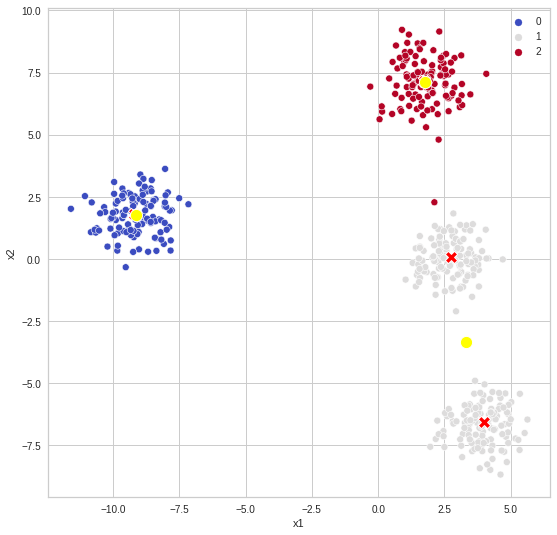

4


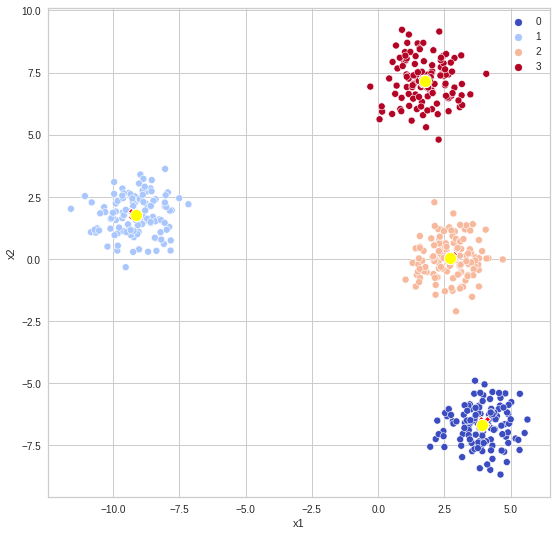

5


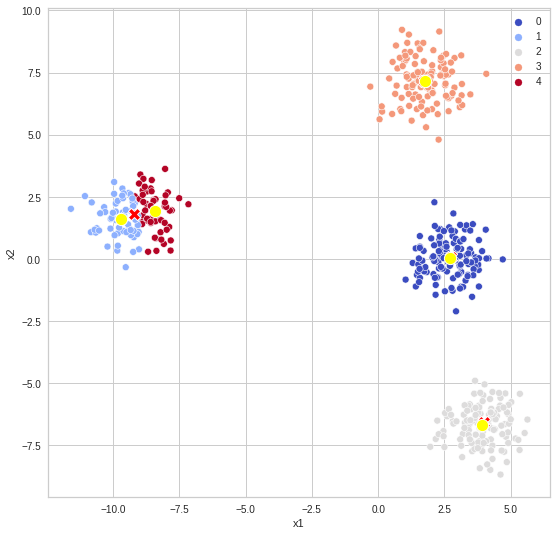

6


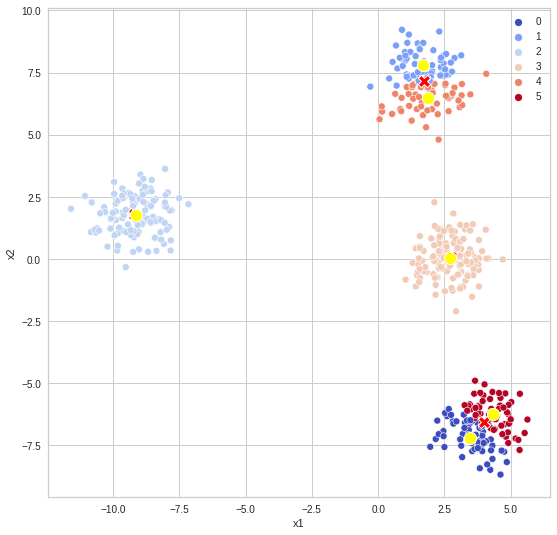

In [ ]:
for _ in range(3,7):
    print(_)
    vis_cluster(_)

## Encontrando el valor de K


k = número de clusters

**Método del codo (Elbow)**

Graficar la inercia x la suma de los errores cuadráticos en el kmeans con diferentes K y se selecciona el valor que se encuentre en el codo.

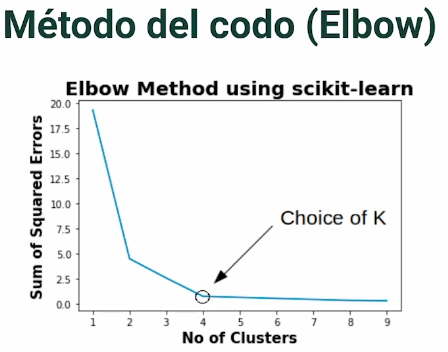









**Coeficiente de silueta**

Qué tan bien están segmentados los clustering con la distancia de otros clustering de manera que puede encontrar qué cluster tiene un índice de silueta más alto y ese es el que debería utilizar para reemplazar el K.

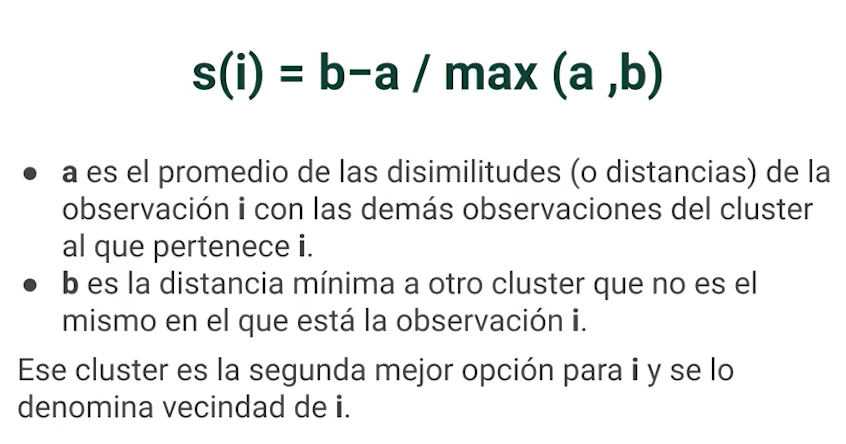



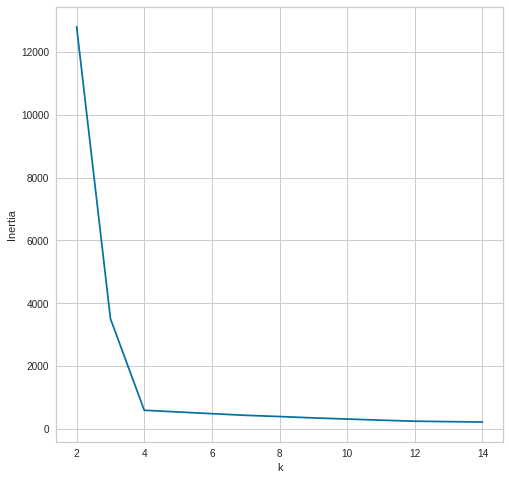

In [ ]:
# Utilización del método
# Se crea lista
sum_of_squared_distances = []
K = range(2,15) # Rango de datos de K
for k in K:
    km = KMeans(n_clusters=k) # Instancia del modelo, se indica la cantidad de clusters
    km = km.fit(X) # Entrenamiento del modelo con lso datos de x
    sum_of_squared_distances.append(km.inertia_) # Se hace append a la suma con el resultado
    #del entrenamiento usando un campo llamado: inertia_ . Este se refiere  a la suma de las distancias cuadráticas para evaluar el método del codo.

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


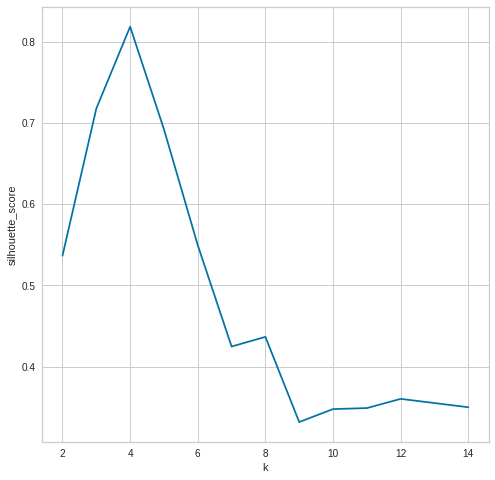

In [ ]:
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X) # Se solicitan las predicciones
    silhouette_scores.append(silhouette_score(X,y)) # Se envía el coeficiente de silueta

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.show()

## Evaluando clusters con K-means

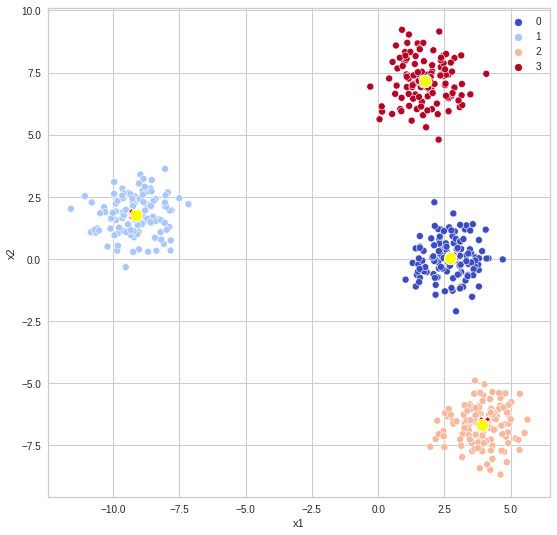

In [ ]:
vis_cluster(4)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c2e9a85d0>,
                     colors='yellowbrick', estimator=KMeans(n_clusters=4))

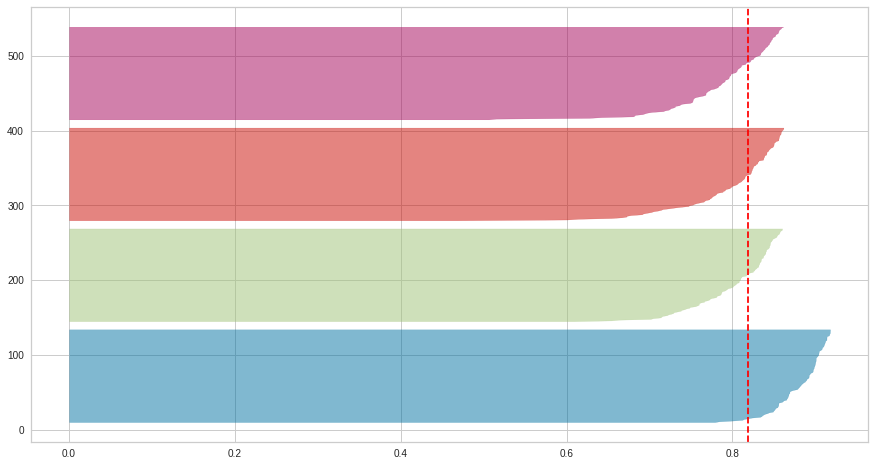

In [ ]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick') # SilhouetteVisualizer librería
visualizer.fit(X)